Saving Weather Data.csv to Weather Data (2).csv
Data Overview:
            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 02:00:00    -1.8              -3.4         89                7   
3 2012-01-01 03:00:00    -1.5              -3.2         88                6   
4 2012-01-01 04:00:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  Year  Month  Day  Hour  \
0            8.0     101.24                   Fog  2012      1    1     0   
1            8.0     101.24                   Fog  2012      1    1     1   
2            4.0     101.26  Freezing Drizzle,Fog  2012      1    1     2   
3            4.0     101.27  Freezing Drizzle,Fog  2012      1    1     3   
4            4.8     101.23                   Fog  2012      1    1     4   


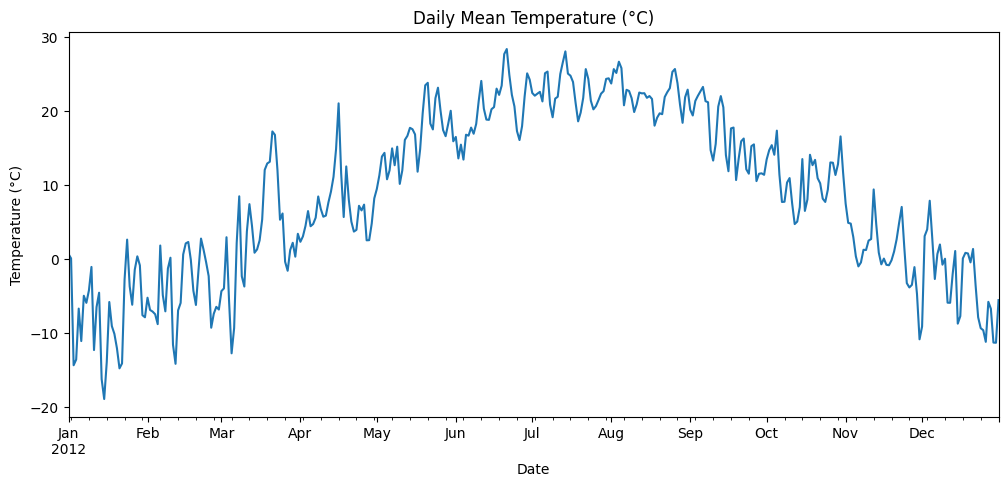

/tmp/ipython-input-1872977933.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(m) for m in range(1, 13)], showmeans=True)


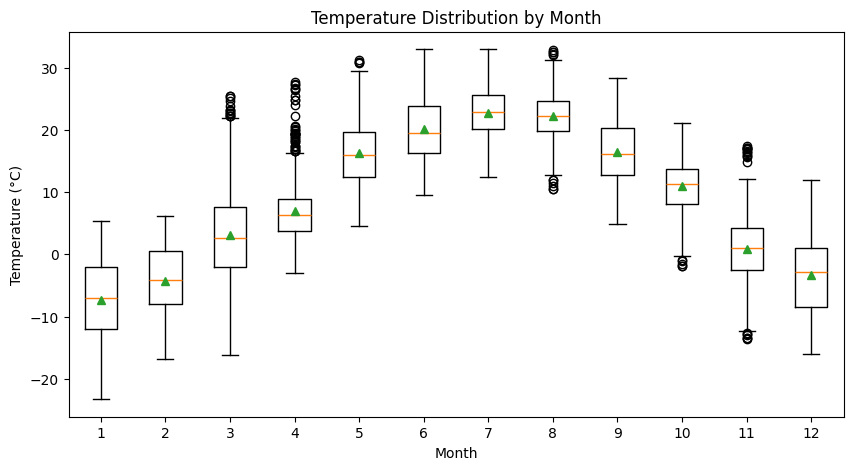

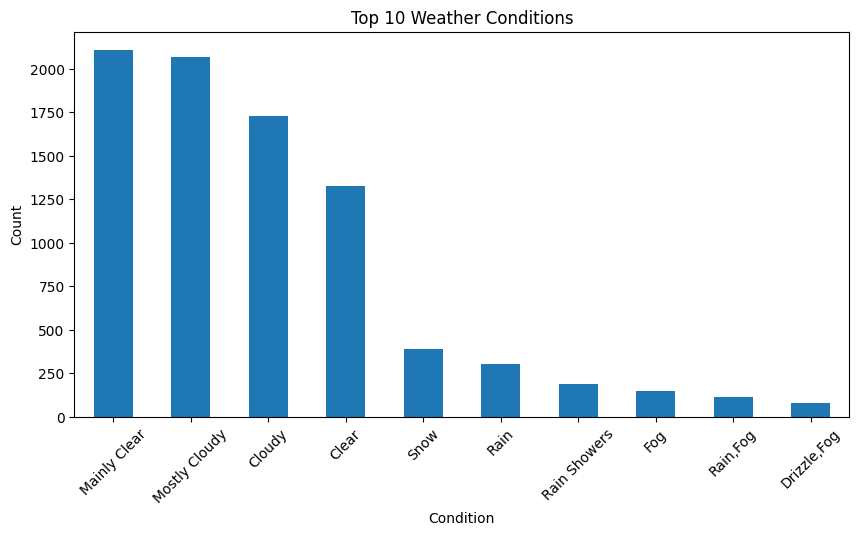

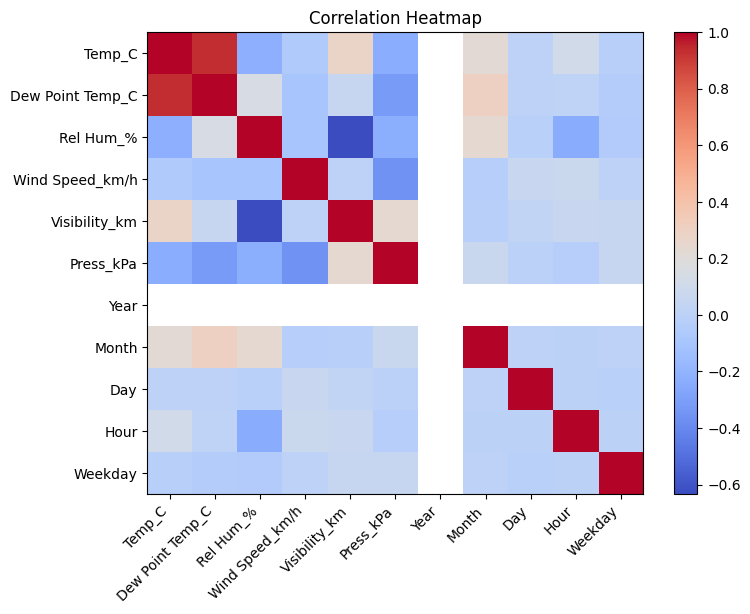

Model Performance:
MAE: 0.6055859116555999
R²: 0.9953549161568652


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("/content/Weather Data.csv")


df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors="coerce")
df = df.dropna(subset=["Date/Time"]).sort_values("Date/Time").reset_index(drop=True)

df["Year"] = df["Date/Time"].dt.year
df["Month"] = df["Date/Time"].dt.month
df["Day"] = df["Date/Time"].dt.day
df["Hour"] = df["Date/Time"].dt.hour
df["Weekday"] = df["Date/Time"].dt.weekday

print("Data Overview:")
print(df.head())
print(df.describe())


def plot_daily_temperature(df):
    daily = df.set_index("Date/Time").resample("D")["Temp_C"].mean()
    plt.figure(figsize=(12,5))
    daily.plot()
    plt.title("Daily Mean Temperature (°C)")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.show()

def plot_monthly_box(df):
    data = [df.loc[df["Month"] == m, "Temp_C"] for m in range(1, 13)]
    plt.figure(figsize=(10,5))
    plt.boxplot(data, labels=[str(m) for m in range(1, 13)], showmeans=True)
    plt.title("Temperature Distribution by Month")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°C)")
    plt.show()

def plot_weather_conditions(df):
    df["Weather"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
    plt.title("Top 10 Weather Conditions")
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

def plot_correlation(df):
    corr = df.select_dtypes(include=[np.number]).corr()
    plt.figure(figsize=(8,6))
    im = plt.imshow(corr, cmap="coolwarm", aspect="auto")
    plt.colorbar(im)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Heatmap")
    plt.show()


plot_daily_temperature(df)
plot_monthly_box(df)
plot_weather_conditions(df)
plot_correlation(df)


features = ["Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h",
            "Visibility_km", "Press_kPa", "Hour", "Month", "Weekday"]

data = df.dropna(subset=features + ["Temp_C"])
X = data[features].values
y = data["Temp_C"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", Ridge(alpha=1.0))
])

model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Model Performance:")
print("MAE:", mean_absolute_error(y_test, preds))
print("R²:", r2_score(y_test, preds))


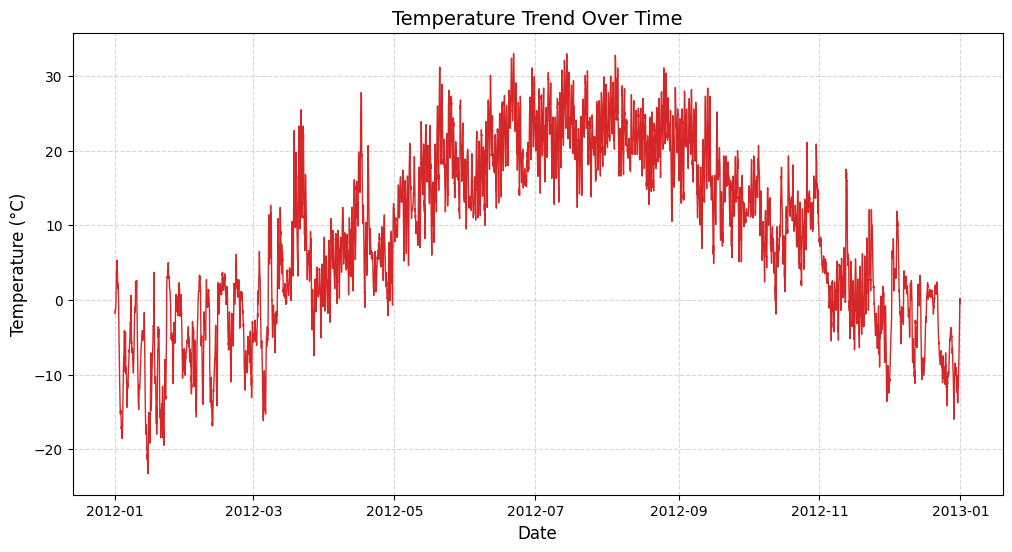

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Weather Data.csv", parse_dates=['Date/Time'])

# Plot Temperature trend
plt.figure(figsize=(12,6))
plt.plot(df['Date/Time'], df['Temp_C'], color='tab:red', linewidth=1)
plt.title("Temperature Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


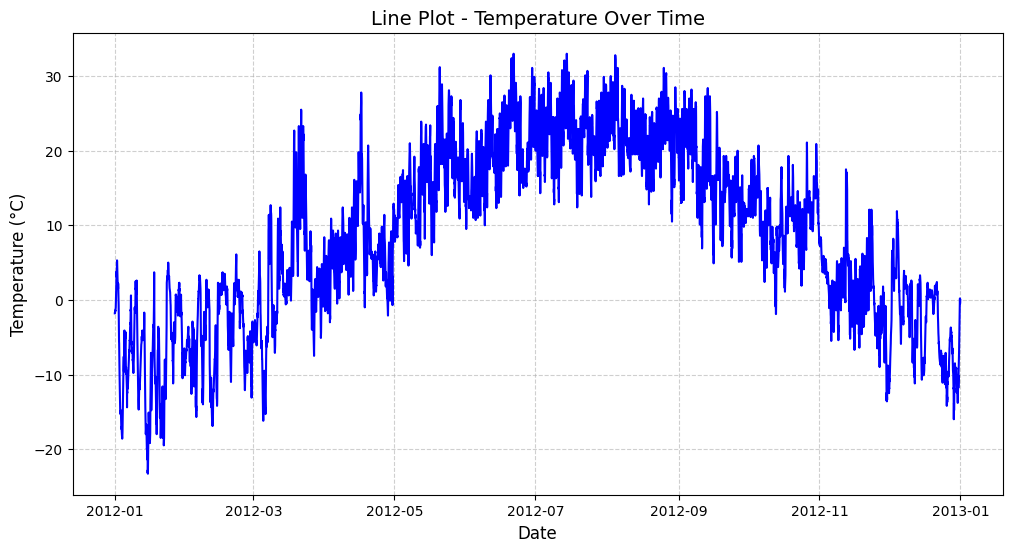

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Weather Data.csv", parse_dates=['Date/Time'])

# Line plot for Temperature
plt.figure(figsize=(12,6))
plt.plot(df['Date/Time'], df['Temp_C'], color='blue', linewidth=1.5)

plt.title("Line Plot - Temperature Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


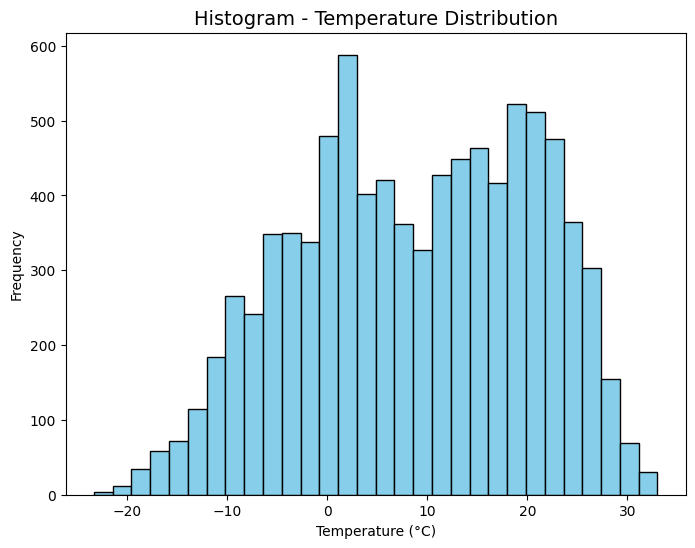

In [8]:
plt.figure(figsize=(8,6))
plt.hist(df['Temp_C'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram - Temperature Distribution", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-153960857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Temp_C'], palette="coolwarm")


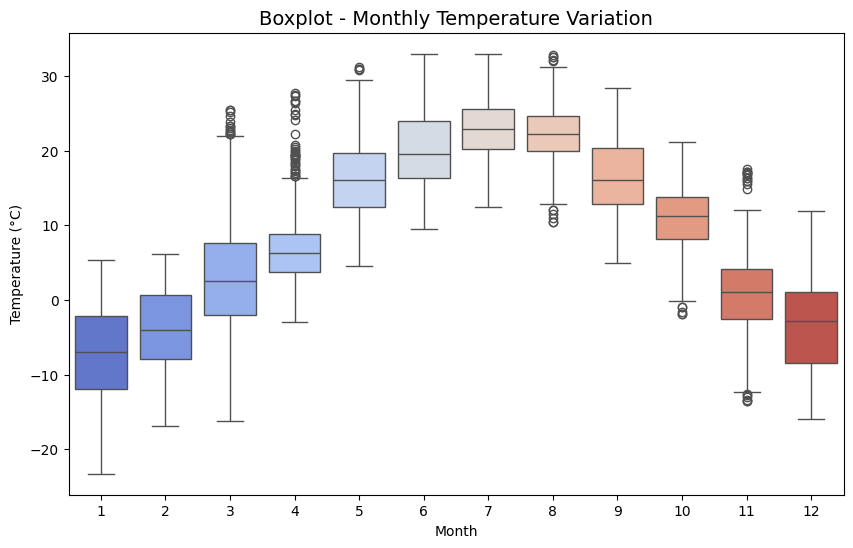

In [9]:
df['Month'] = df['Date/Time'].dt.month

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Month'], y=df['Temp_C'], palette="coolwarm")
plt.title("Boxplot - Monthly Temperature Variation", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


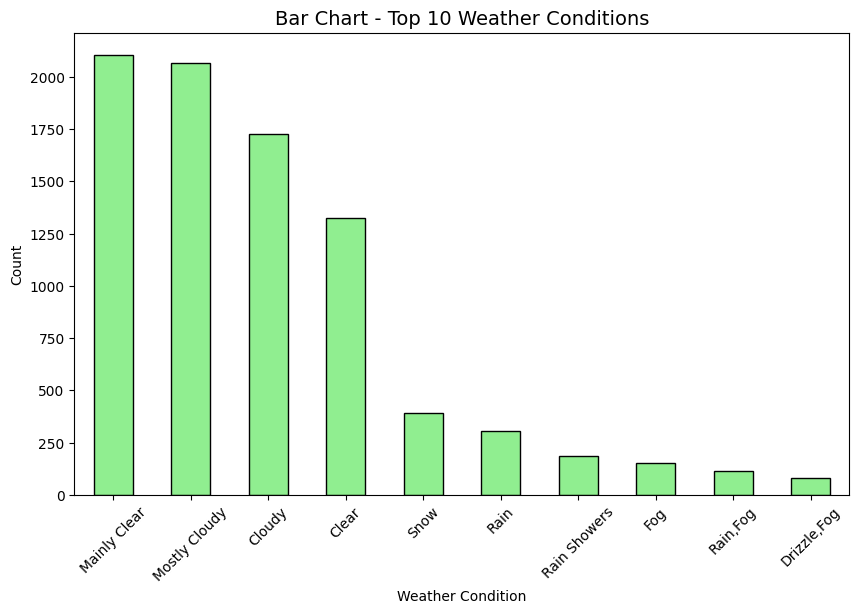

In [10]:
plt.figure(figsize=(10,6))
df['Weather'].value_counts().head(10).plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Bar Chart - Top 10 Weather Conditions", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


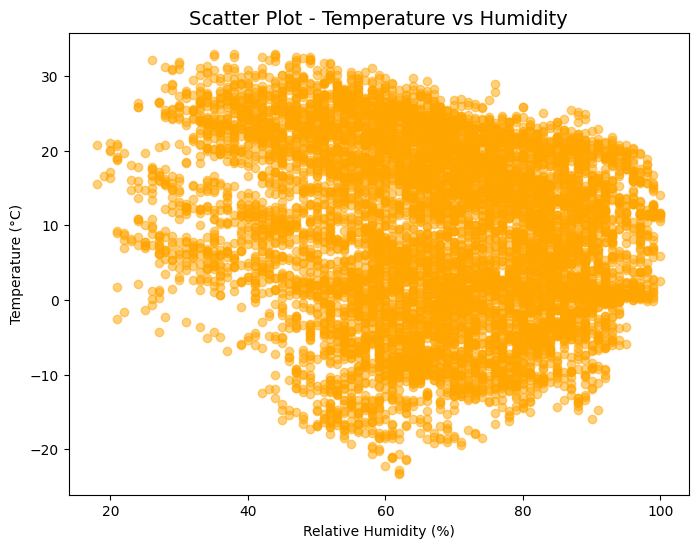

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['Rel Hum_%'], df['Temp_C'], alpha=0.5, color='orange')
plt.title("Scatter Plot - Temperature vs Humidity", fontsize=14)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()


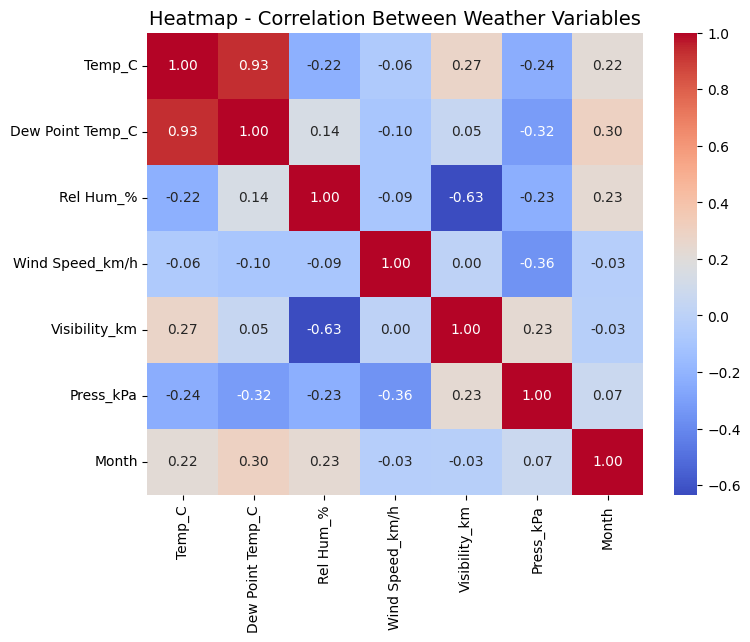

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap - Correlation Between Weather Variables", fontsize=14)
plt.show()


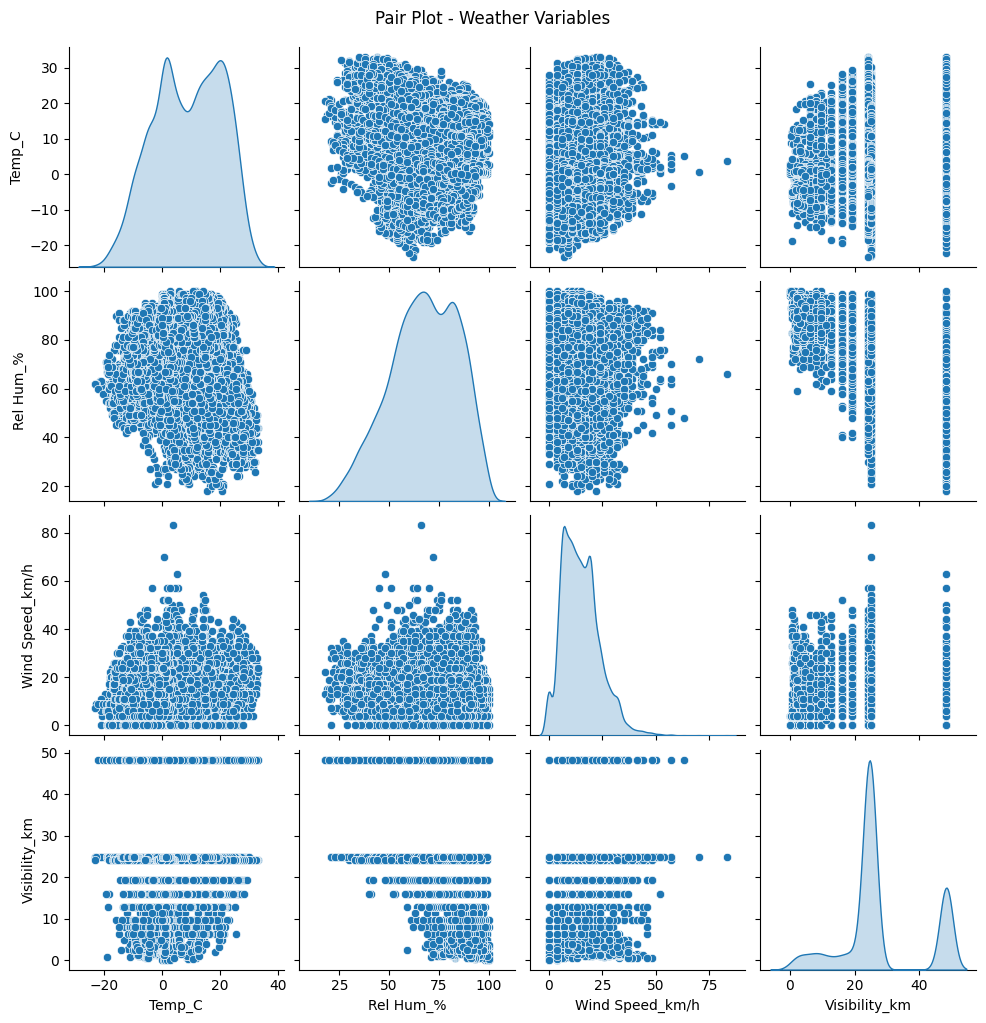

In [13]:
sns.pairplot(df[['Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km']], diag_kind='kde')
plt.suptitle("Pair Plot - Weather Variables", y=1.02)
plt.show()


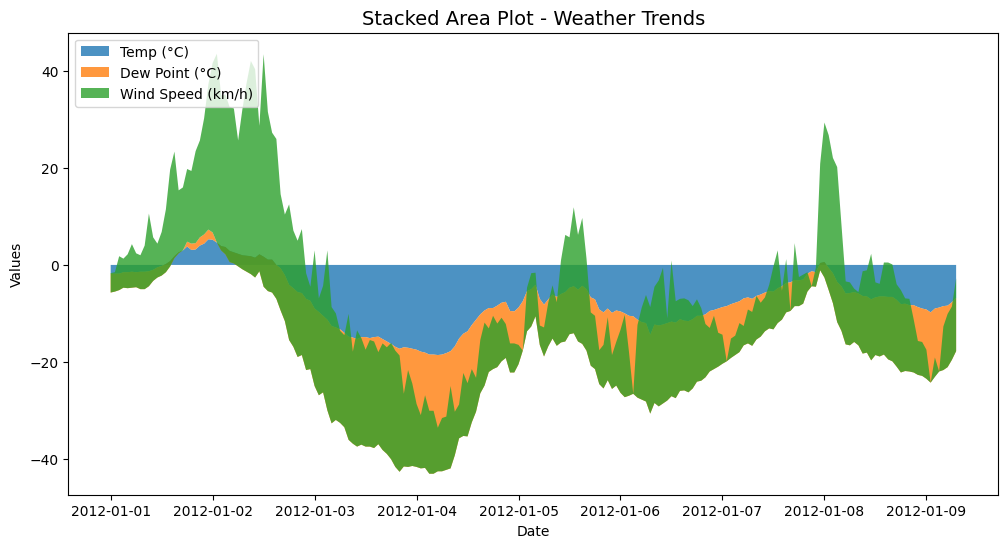

In [14]:
plt.figure(figsize=(12,6))
plt.stackplot(df['Date/Time'][:200],   # limiting to 200 points for clarity
              df['Temp_C'][:200],
              df['Dew Point Temp_C'][:200],
              df['Wind Speed_km/h'][:200],
              labels=['Temp (°C)','Dew Point (°C)','Wind Speed (km/h)'],
              alpha=0.8)
plt.title("Stacked Area Plot - Weather Trends", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(loc="upper left")
plt.show()


/tmp/ipython-input-1223693805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Month'], y=df['Temp_C'], palette="Set2")


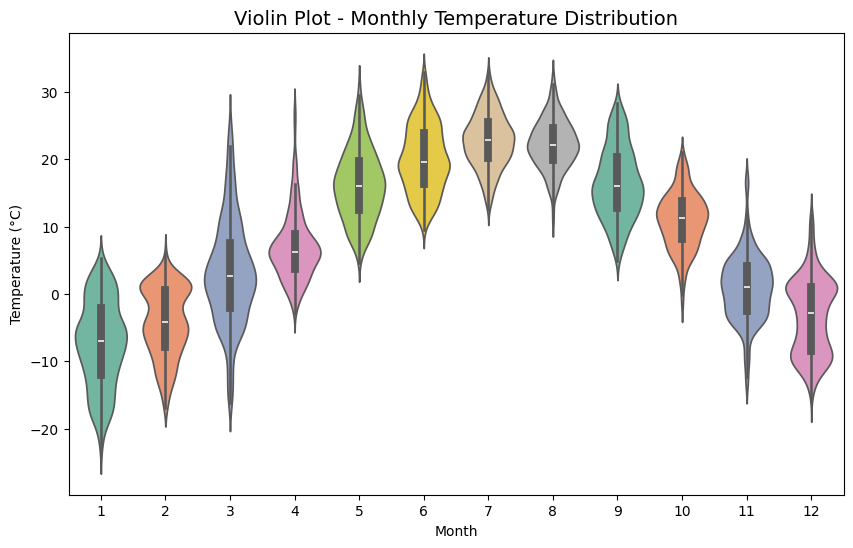

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Month'], y=df['Temp_C'], palette="Set2")
plt.title("Violin Plot - Monthly Temperature Distribution", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


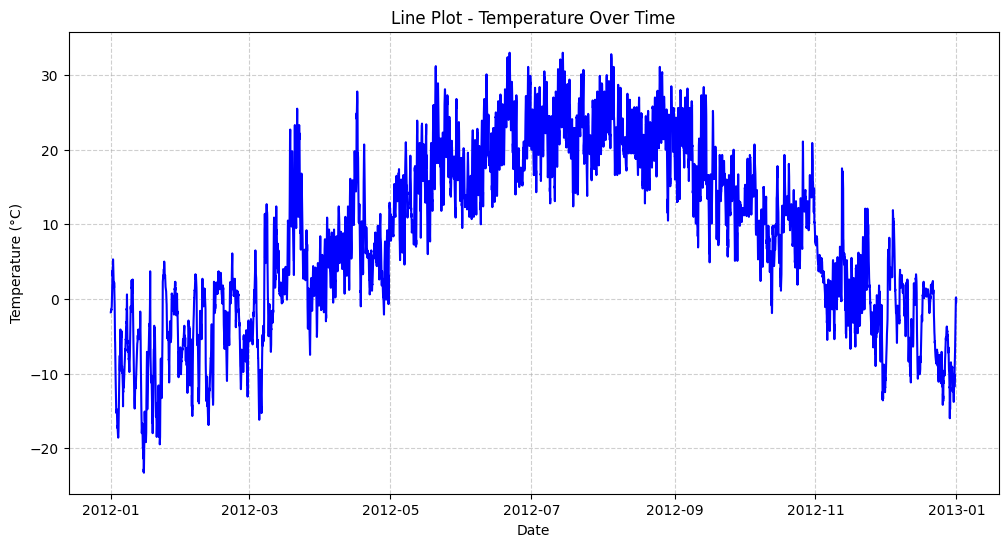

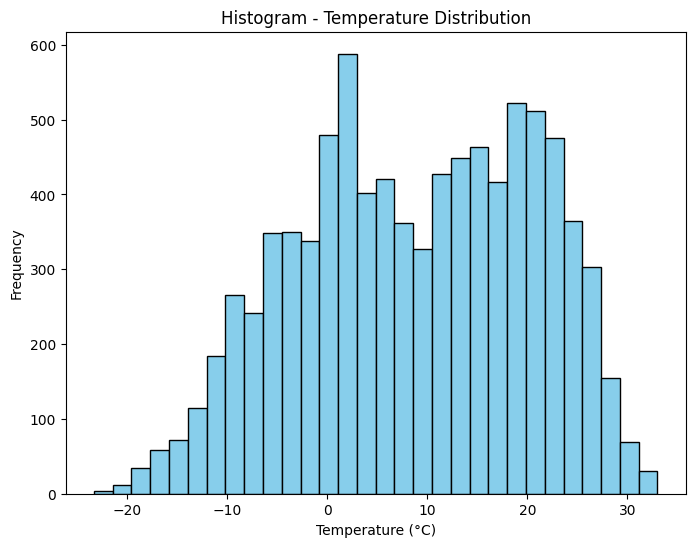

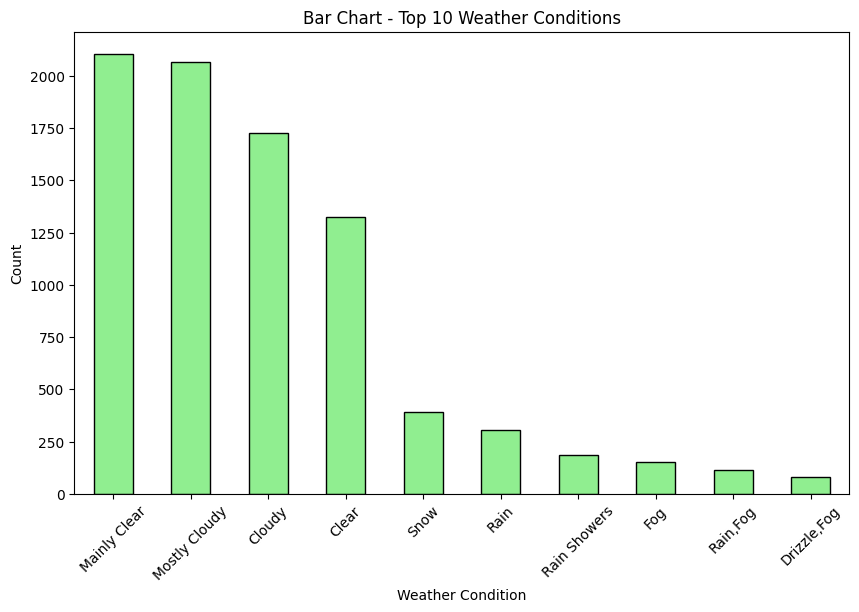

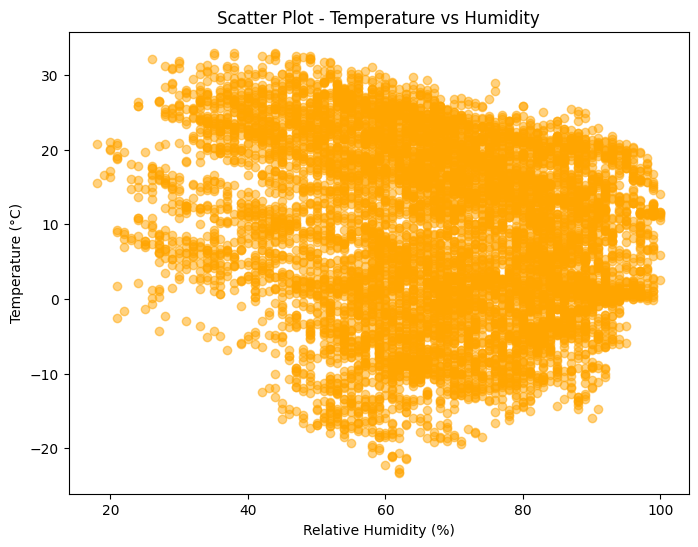

/tmp/ipython-input-3754218103.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Temp_C'], palette="coolwarm")


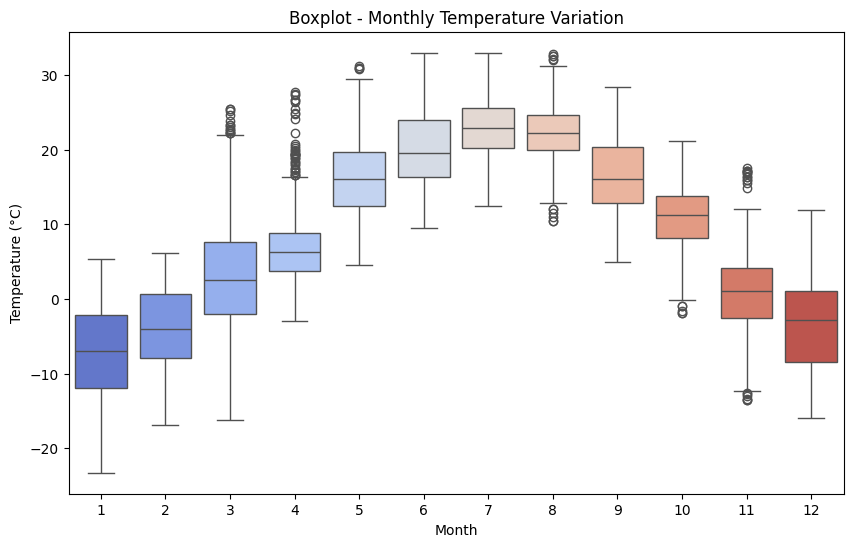

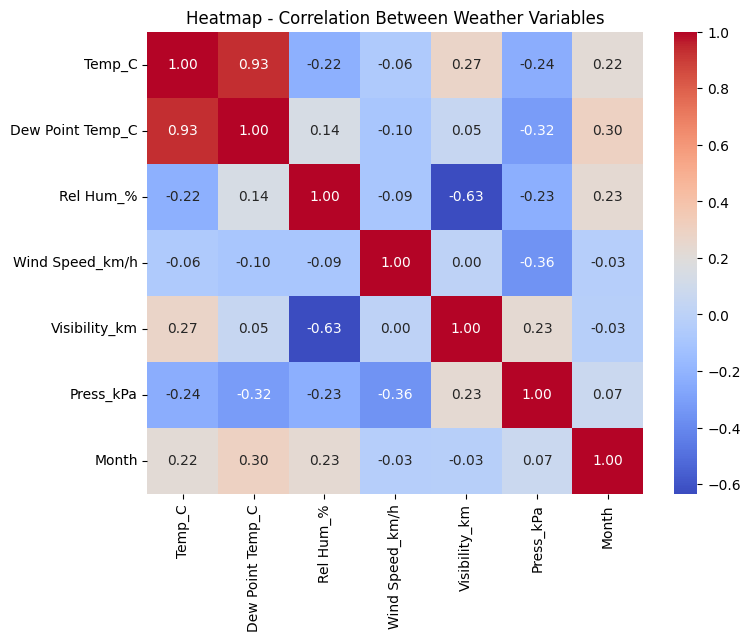

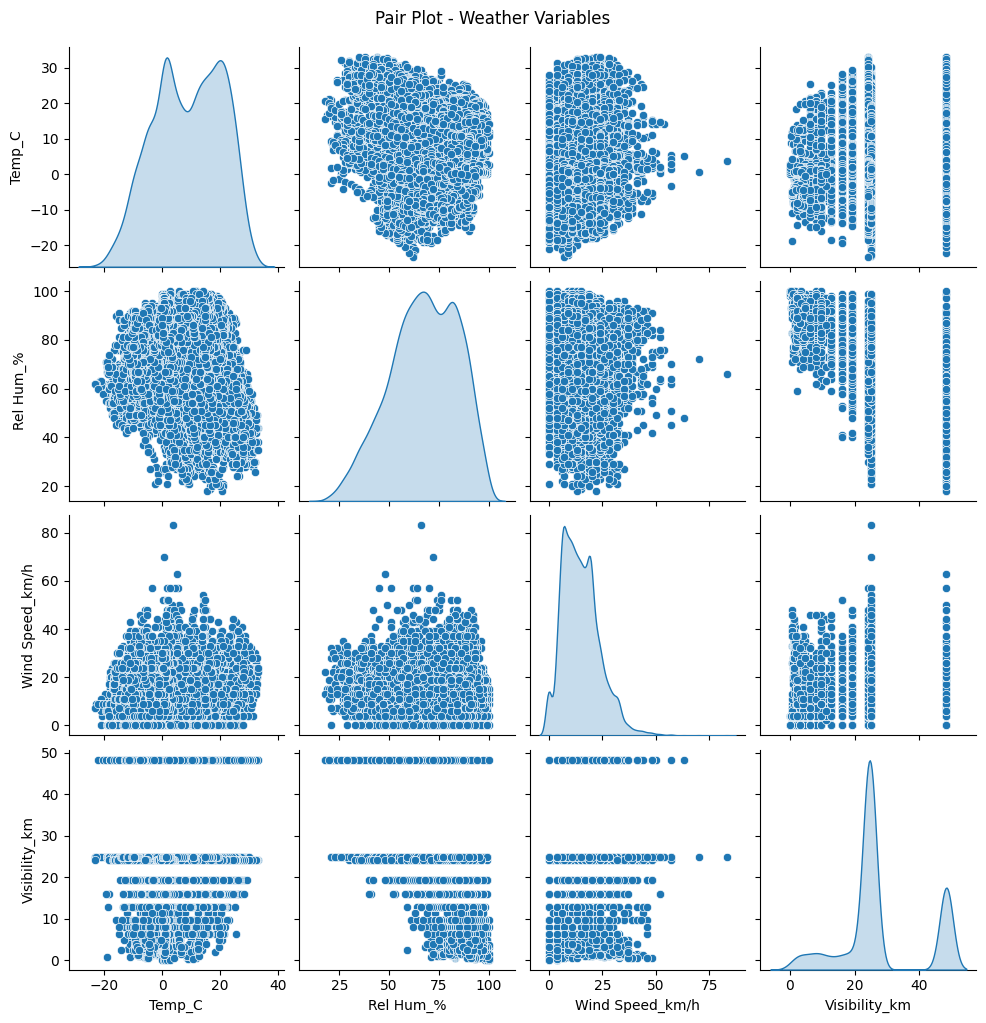

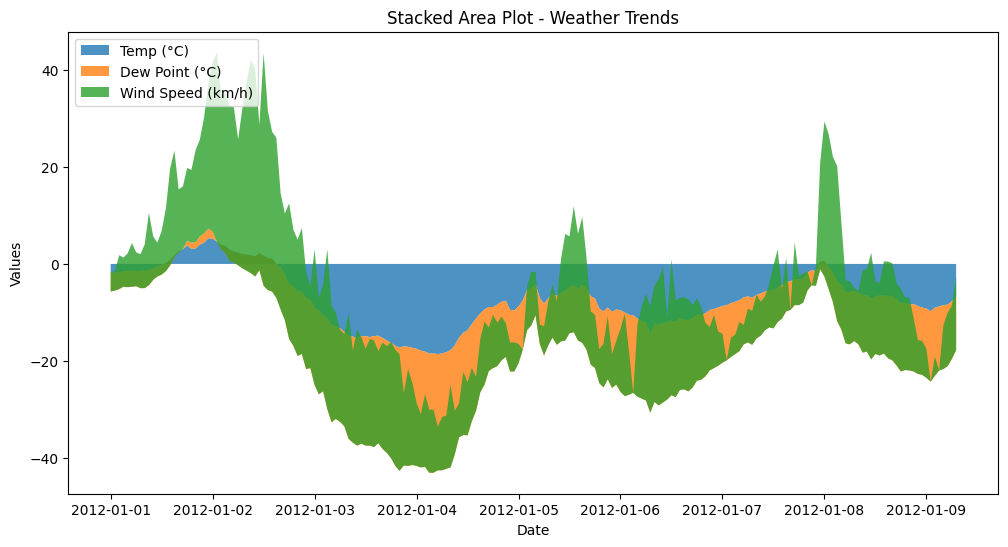

/tmp/ipython-input-3754218103.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Month'], y=df['Temp_C'], palette="Set2")


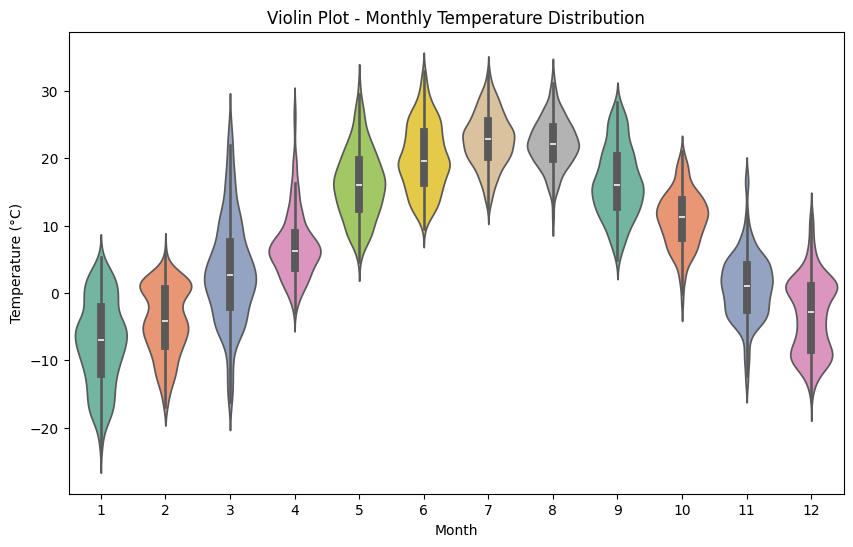

In [17]:
# Weather Data Visualization Project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Weather Data.csv", parse_dates=['Date/Time'])

# Create Month column
df['Month'] = df['Date/Time'].dt.month

# ------------------- 1. Line Plot -------------------
plt.figure(figsize=(12,6))
plt.plot(df['Date/Time'], df['Temp_C'], color='blue', linewidth=1.5)
plt.title("Line Plot - Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ------------------- 2. Histogram -------------------
plt.figure(figsize=(8,6))
plt.hist(df['Temp_C'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram - Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# ------------------- 3. Bar Chart -------------------
plt.figure(figsize=(10,6))
df['Weather'].value_counts().head(10).plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Bar Chart - Top 10 Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ------------------- 4. Scatter Plot -------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Rel Hum_%'], df['Temp_C'], alpha=0.5, color='orange')
plt.title("Scatter Plot - Temperature vs Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

# ------------------- 5. Boxplot -------------------
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Month'], y=df['Temp_C'], palette="coolwarm")
plt.title("Boxplot - Monthly Temperature Variation")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

# ------------------- 6. Heatmap -------------------
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap - Correlation Between Weather Variables")
plt.show()

# ------------------- 7. Pair Plot -------------------
sns.pairplot(df[['Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km']], diag_kind='kde')
plt.suptitle("Pair Plot - Weather Variables", y=1.02)
plt.show()

# ------------------- 8. Stacked Area Plot -------------------
plt.figure(figsize=(12,6))
plt.stackplot(df['Date/Time'][:200],   # first 200 rows for clarity
              df['Temp_C'][:200],
              df['Dew Point Temp_C'][:200],
              df['Wind Speed_km/h'][:200],
              labels=['Temp (°C)','Dew Point (°C)','Wind Speed (km/h)'],
              alpha=0.8)
plt.title("Stacked Area Plot - Weather Trends")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(loc="upper left")
plt.show()

# ------------------- 9. Violin Plot -------------------
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Month'], y=df['Temp_C'], palette="Set2")
plt.title("Violin Plot - Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()
